In [17]:
##############################
# Solves -u'' + u = f        #
# With zero Neumann boundary #
##############################
import radiant as rad
import numpy as np


# Problem Parameters
a = -1.
b = 1


def u(x):
    return np.cos(x * 2 * np.pi / (b - a))


def f(x):
    return ((2 * np.pi / (b - a)) ** 2 + 1) * np.cos(x * 2 * np.pi / (b - a))

In [18]:
# Parameters
d = 1
k = 1
delta = 1.
N = 50

# Computed Parameters
phi = rad.Wendland(d, k)
centres = np.linspace(a, b, N)
integrator = rad.integrate.TrapezoidIntegrator(a, b, 5000)
error_integrator = rad.integrate.LeggaussIntegrator(a, b, 500)

# Solve for approximate solution
solver = rad.solve.HelmholtzBaseSolver(phi, centres, delta, integrator)
approx = solver.solve(f)
error = rad.error(u, approx, error_integrator)

print("L2 Relative Error:", error)
print("Condition Number:", solver.cond())

L2 Relative Error: 5.217821549043909e-05
Condition Number: 22754445.175856676


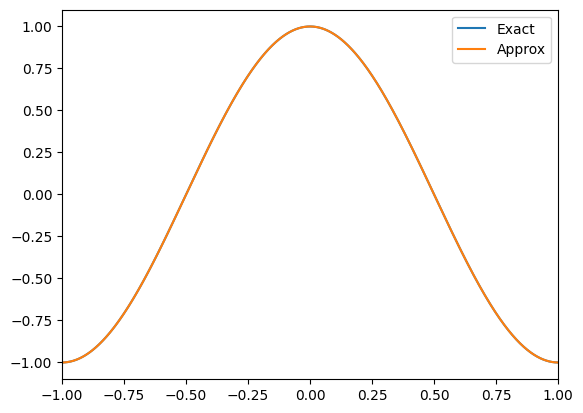

In [19]:
rad.plot.many(a, b, u, approx, labels=["Exact", "Approx"])